## Import Library & Import Dataset

In [14]:
from pycaret.classification import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam_dataset.csv")
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [19]:
df.count()

message_content    1000
is_spam            1000
dtype: int64

## Preview Data

In [12]:
df.head(10)

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1
5,You have been selected to receive a special of...,1
6,"Hello Christian,\n\nJust wanted to touch base ...",0
7,"Dear Bethany,\n\nI hope you’re doing well. I j...",0
8,"Free vacation, no strings attached! Book now a...",1
9,Claim your free gift now! Limited time offer.\...,1


In [10]:
df.isna().value_counts()

message_content  is_spam
False            False      1000
Name: count, dtype: int64

<Axes: xlabel='is_spam'>

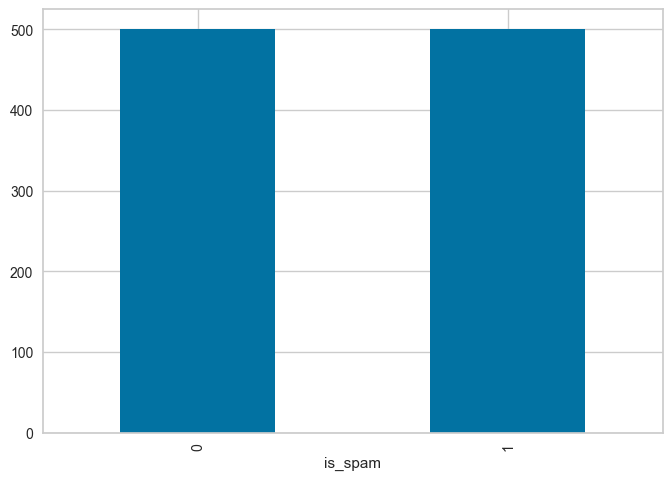

In [17]:
#Checking Classes is it balance or not 
df["is_spam"].value_counts().plot.bar()

## Text Preprocessing

In [20]:
#Text Cleaner (Lowercase all)
import string 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Applying the cleaning function to our dataset
df['message_content'] = df['message_content'].apply(lambda x: clean_text(x))

In [22]:
# Download necessary NLTK data
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Function to apply lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Applying stemming and lemmatization
df['message_content'] = df['message_content'].apply(lambda x: stem_text(x))
df['message_content'] = df['message_content'].apply(lambda x: lemmatize_text(x))

[nltk_data] Downloading package wordnet to C:\Users\MyBook Hype
[nltk_data]     AMD\AppData\Roaming\nltk_data...


In [23]:
df.head()

,message_content,is_spam
0,hello lonni just want to touch base regard our...,0
1,congratul youv won a prize call u now to claim...,1
2,you have been preapprov for a credit card with...,1
3,limit time offer act now onli a few spot left ...,1
4,your loan ha been approv transfer fund today h...,1


## Modelling

In [25]:
setupz = setup(data = df,  target = 'is_spam')
best_model = compare_models()

,Description,Value
0,Session id,1927
1,Target,is_spam
2,Target type,Binary
3,Original data shape,"(1000, 2)"
4,Transformed data shape,"(1000, 2)"
5,Transformed train set shape,"(700, 2)"
6,Transformed test set shape,"(300, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.6640
knn,K Neighbors Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.3670
dt,Decision Tree Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0140
ridge,Ridge Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0180
rf,Random Forest Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0610
ada,Ada Boost Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0210
gbc,Gradient Boosting Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0310
lda,Linear Discriminant Analysis,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0150
et,Extra Trees Classifier,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0530
lightgbm,Light Gradient Boosting Machine,0.9186,0.9186,0.8371,1.0000,0.9102,0.8371,0.8495,0.0390


In [26]:
ada = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9143,0.8286,1.0000,0.9062,0.8286,0.8410
1,0.9571,0.9571,0.9143,1.0000,0.9552,0.9143,0.9177
2,0.9000,0.9000,0.8000,1.0000,0.8889,0.8000,0.8165
3,0.8857,0.8857,0.7714,1.0000,0.8710,0.7714,0.7924
4,0.9571,0.9571,0.9143,1.0000,0.9552,0.9143,0.9177
5,0.9000,0.9000,0.8000,1.0000,0.8889,0.8000,0.8165
6,0.9286,0.9286,0.8571,1.0000,0.9231,0.8571,0.8660
7,0.9143,0.9143,0.8286,1.0000,0.9062,0.8286,0.8410
8,0.9571,0.9571,0.9143,1.0000,0.9552,0.9143,0.9177


In [27]:
evaluate_model(ada)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Testing


In [34]:
predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9200,0.9200,0.8400,1.0000,0.9130,0.8400,0.8510


,message_content,is_spam,prediction_label,prediction_score
907,hello ami plea review the attach document and ...,0,0,1.0
97,dear amanda i want to let you know about the u...,0,0,1.0
927,your loan ha been approv transfer fund today e...,1,1,1.0
221,claim your free gift now limit time offer don’...,1,1,1.0
161,dear michael thank you for your patienc i’v at...,0,0,1.0
...,...,...,...,...
974,dear barbara thank you for reach out i have at...,0,0,1.0
763,urgent your account ha been compromis verifi y...,1,1,1.0
734,hi dian just a remind about the deadlin for th...,0,0,1.0
510,your account ha been flag plea verifi your det...,1,0,1.0
